# Analiza statystyczna grafu przy użyciu standardowych narzędzi
Monika Pawluczuk, nr albumu 246428
Zbiór danych wybrany na podstawie nr albumu: *Interakcje pomiędzy pracownikami małej firmy, zanotowane przez obserwatora.*

## Zadanie 1.
Wczytanie pobranego grafu. Graf został pobrany w formacie .pickle jako obiekt igraph, a następnie wyeksportowany do formatu Pajek. Następnie graf w formacie Pajek został wczytany jako obiekt networkx i na nim zostały wykonane wszystkie obliczenia za pomocą pakietu networkx.

In [1]:
import igraph
A = igraph.Graph.Read_Pickle("bkoff.pickle")
A["BKOFFB"].write_pajek("bkoffb.pajek")

## Zadanie 2.
Przekształcenie grafu. Po zaimportowaniu grafu do networkx, zostały z niego usunięte zduplikowane krawędzie oraz graf został przekształcony na nieskierowany i przy okazji wyeksportowany do formatu Pajek aby na nim wykonywać zadania w programie Pajek.

Graf posiada 40 wierzchołków, które są połączone 238 krawędziami.

In [2]:
import networkx as nx
G = nx.read_pajek("bkoffb.pajek")
# przekształcenie na graf nieskierowany, bez zduplikowanych krawedzi
G = nx.Graph(G)
nx.write_pajek(G, "bkoffb-networkx.pajek")
G = nx.read_pajek("bkoffb-networkx.pajek")
print("Rozmiar grafu: ", len(G.edges()), "Rzad grafu: ", len(G.nodes()))

('Rozmiar grafu: ', 238, 'Rzad grafu: ', 40)


## Zadanie 3.
### Networkx
Wyznacz składowe spójne. Ile ich jest; jaki jest rząd i rozmiar największej z nich?

Istnieje tylko jedna składowa spójna grafu, a więc automatycznie jest ona największa. Zawiera ona w sobie wszystkie wierzchołki, więc jej rząd wynosi 40. Podobnie z rozmiarem, który wynosi 238 (wszystkie istniejące krawędzie).

Liczba składowych spójnych:

In [3]:
nx.number_connected_components(G)

1

Posortowana wg. długości tablica wszystkich składowych spójnych:

In [4]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[40]

Lista grafów zawierająca składowe spójne jako oddzielne podgrafy i liczba krawędzi pierwszej (i jedynej) z nich:

In [5]:
graphs = list(nx.connected_component_subgraphs(G))
graphs[0].number_of_edges()

238

### Pajek

Po wczytaniu grafu, używając polecenia: Network -> Create Partition -> Components -> Strong został utworzony jeden podgraf, zawierający wszystkie 40 wierzchołków. Wynik jest więc zgodny z wynikami otrzymanymi w NetworkX.

Wydruk Pajeka:

In [ ]:
==============================================================================
Strong Components
==============================================================================
 Working...
 Number of components: 1
 Size of the largest component: 40 vertices (100.000%).
 Time spent:  0:00:00

## Zadanie 4.
Wykreśl graf w Pajeku.

Wielkość wierzchołka w grafie jest proporcjonalna do stopnia centralności w grafie. Zostały zmienione kolory krawędzi i wierzchołków w celu lepszej czytelności grafu.

Został użyty rozkład wierzchołków typu Energy, Kamada-Kawai, Separate Components.
![Pajek network](pajek-network.jpg)

## Zadanie 5.
Znajdź pięć wierzchołków o największych wartościach:
### bliskości (*closeness centrality*)

Wierzchołki z numerami: 1, 2, 12, 13, 15.

In [6]:
cent_dict = nx.closeness_centrality(G)
cent_items=[(b,a) for (a,b) in cent_dict.iteritems()]
cent_items.sort(reverse=True)
cent_items[0:5]

[(0.6724137931034483, u'n13'),
 (0.6610169491525424, u'n2'),
 (0.65, u'n15'),
 (0.65, u'n12'),
 (0.65, u'n1')]

### pośrednictwa (*betweenness centrality*)

Wierzchołki z numerami: 1, 2, 12, 13, 21.

In [7]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_items = [(b,a) for (a,b) in betweenness_dict.iteritems()]
betweenness_items.sort(reverse=True)
betweenness_items[0:5]

[(0.06225133611416058, u'n1'),
 (0.04532200555595849, u'n12'),
 (0.043181681821834246, u'n2'),
 (0.041438373178073105, u'n13'),
 (0.039945056663322924, u'n21')]

### rangi (*degree centrality*)

Wierzchołki z numerami: 1, 2, 12, 13, 15.

In [8]:
degree_dict = nx.degree_centrality(G)
degree_items = [(b,a) for (a,b) in degree_dict.iteritems()]
degree_items.sort(reverse=True)
degree_items[0:5]

[(0.5128205128205128, u'n13'),
 (0.48717948717948717, u'n2'),
 (0.48717948717948717, u'n12'),
 (0.4615384615384615, u'n15'),
 (0.4615384615384615, u'n1')]

## Zadanie 6.
Znajdź wszystkie największe kliki - ile ich jest i jakiego rzędu?

W tym grafie istnieją 142 największe kliki, o rzędach:
* 2 (4 kliki o rzędzie równym dwa), 
* 3 (41), 
* 4 (60), 
* 5 (26), 
* 6 (11).

Ilość największych klik:

In [9]:
# Returns the number of maximal cliques in G.
nx.graph_number_of_cliques(G)

142

Rzędy największych klik:

In [10]:
max_cliques = list(nx.find_cliques(G))
cliques = [len(c) for c in sorted(max_cliques, key=len, reverse=True)]
list(set(cliques))

[2, 3, 4, 5, 6]

## Zadanie 7.
Przeprowadź grupowanie aglomeracyjne UPGMA. Wykreśl dendrogram lub jego istotny fragment i zaproponuj arbitralny podział grafu.

Grupowanie aglomeracyjne wymaga macierzy odległości dla wierzchołków w grafie. Aby stworzyć taką macierz, która jako odległość przyjmuje ilość krawędzi przez które trzeba przejść idąc z wierzchołka A do B (najkrótsza ścieżka). Macierz została stworzona za pomocą algorytmu Floyda:

In [11]:
fw = nx.floyd_warshall_numpy(G)

A następnie macierz została użyta w grupowaniu:

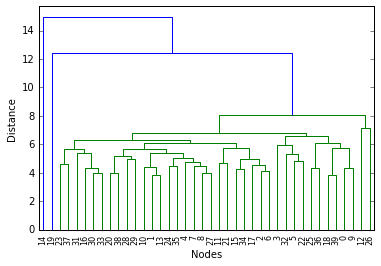

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.cluster

plt.ylabel('Distance')
plt.xlabel('Nodes')
z = scipy.cluster.hierarchy.linkage(fw, method='average')
d = scipy.cluster.hierarchy.dendrogram(z,leaf_rotation=90.)
plt.show()

Arbitralny podział grafu

### TBD